Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
<meshio mesh object>
  Number of points: 1941
  Number of cells:
    line: 160
    triangle: 3720
    vertex: 4


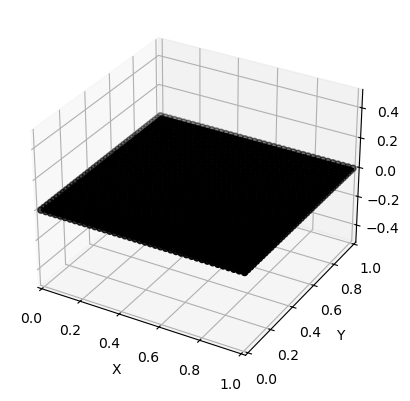

In [1]:
# %%
import numpy as np
from scipy.spatial import Delaunay, minkowski_distance
import meshio
import pygmsh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mesh import Mesh
import scipy.sparse.linalg as spla

with pygmsh.geo.Geometry() as geom:
    geom.add_rectangle(0.0, 1.0, 0.0, 1.0, 0.0, mesh_size=0.025)
    mesh = geom.generate_mesh()

#with pygmsh.geo.Geometry() as geom:
#    geom.add_circle([0.0, 0.0], 1.0, mesh_size=0.2)
#    mesh = geom.generate_mesh()

#with pygmsh.occ.Geometry() as geom:
#    ellipsoid = geom.add_ellipsoid([0.0, 0.0, 0.0], [1.0, 1.0, 1.0],mesh_size=0.2, with_volume=False)
#    mesh = geom.generate_mesh()

#print(mesh.points)
#print(mesh.cells_dict['triangle'])
#print(np.min(mesh.cells_dict['triangle']))
#print(np.max(mesh.cells_dict['triangle']))
print(mesh)

points = mesh.points
simplices = mesh.cells_dict['triangle']

if len(simplices) < 5000:
    # Setup for a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each simplex
    for simplex in simplices:
        polygon = points[simplex]
        ax.add_collection3d(Poly3DCollection([polygon], facecolors='grey', linewidths=1, edgecolors='k', alpha=.1))

    # Set plot display parameters
    ax.scatter(points[:,0], points[:,1], points[:,2], color='k')  # Plot the points
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Adjusting the scale for better visualization
    max_range = np.array([points[:,0].max()-points[:,0].min(), 
                        points[:,1].max()-points[:,1].min(), 
                        points[:,2].max()-points[:,2].min()]).max() / 2.0
    mid_x = (points[:,0].max()+points[:,0].min()) * 0.5
    mid_y = (points[:,1].max()+points[:,1].min()) * 0.5
    mid_z = (points[:,2].max()+points[:,2].min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

In [2]:
point_normals = np.array([[0,0,1]]*len(simplices))
mesh = Mesh(points, simplices, point_normals)

In [3]:
# %% Init
# \phi = x^2 + y^2 + (xy)^2
xc = mesh.barycenters[:,0]
yc = mesh.barycenters[:,1]
zc = mesh.barycenters[:,2]

phi = 0*xc

rhou = np.array([[1,1,0]]*len(simplices))

J,rhs = mesh.convection_matrix(phi, rhou)
Iv = mesh.identity_matrix()

In [4]:
with meshio.xdmf.TimeSeriesWriter("convection_test.xdmf") as writer:
    writer.write_points_cells(points, [("triangle", simplices),])
    for t in range(101):
        #J,rhs = mesh.convection_matrix(phi, rhou, quick=True)
        # Solve
        dt = 0.01
        crank_nicolson_coeff = 0.5
        phi = spla.gmres(Iv+crank_nicolson_coeff*dt*J, phi*mesh.areas-(1.0-crank_nicolson_coeff)*dt*J@phi+dt*rhs)[0]
        print(t*dt)
        writer.write_data(t*dt, cell_data={"phi": [phi]})

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
